## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1          X2        X3         X4         Y
0   3.206511  707.998285  0.274285   2.010906  1.435966
1  80.858827  319.252512  0.848720  10.999663  1.294924
2  52.832391  876.765122  0.619980   8.500660  1.531438
3  94.655310  403.215146  0.752728  10.763136  1.188805
4  22.125074  428.189930  0.825956   9.055148  1.577226


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9215046	total: 69.4ms	remaining: 1m 9s
1:	learn: 0.9111504	total: 69.7ms	remaining: 34.8s
2:	learn: 0.9040524	total: 70.2ms	remaining: 23.3s
3:	learn: 0.8956866	total: 70.5ms	remaining: 17.6s
4:	learn: 0.8868453	total: 70.9ms	remaining: 14.1s
5:	learn: 0.8796864	total: 71.2ms	remaining: 11.8s
6:	learn: 0.8713887	total: 71.6ms	remaining: 10.2s
7:	learn: 0.8645156	total: 72ms	remaining: 8.92s
8:	learn: 0.8569288	total: 72.4ms	remaining: 7.98s
9:	learn: 0.8493462	total: 72.7ms	remaining: 7.2s
10:	learn: 0.8425809	total: 73.2ms	remaining: 6.58s
11:	learn: 0.8355394	total: 73.6ms	remaining: 6.06s
12:	learn: 0.8279369	total: 74ms	remaining: 5.62s
13:	learn: 0.8203484	total: 74.5ms	remaining: 5.25s
14:	learn: 0.8132686	total: 74.9ms	remaining: 4.92s
15:	learn: 0.8055683	total: 75.4ms	remaining: 4.64s
16:	learn: 0.7998233	total: 75.9ms	remaining: 4.39s
17:	learn: 0.7934002	total: 76.3ms	remaining: 4.16s
18:	learn: 0.7884154	total: 76.7ms	remaining: 3.9

76:	learn: 0.5219061	total: 101ms	remaining: 1.21s
77:	learn: 0.5189610	total: 102ms	remaining: 1.2s
78:	learn: 0.5154873	total: 102ms	remaining: 1.19s
79:	learn: 0.5123606	total: 103ms	remaining: 1.18s
80:	learn: 0.5089840	total: 103ms	remaining: 1.17s
81:	learn: 0.5066696	total: 103ms	remaining: 1.16s
82:	learn: 0.5036294	total: 104ms	remaining: 1.15s
83:	learn: 0.5009799	total: 104ms	remaining: 1.14s
84:	learn: 0.4982934	total: 105ms	remaining: 1.13s
85:	learn: 0.4958826	total: 105ms	remaining: 1.12s
86:	learn: 0.4929788	total: 105ms	remaining: 1.11s
87:	learn: 0.4900515	total: 106ms	remaining: 1.1s
88:	learn: 0.4873843	total: 106ms	remaining: 1.09s
89:	learn: 0.4844153	total: 107ms	remaining: 1.08s
90:	learn: 0.4814403	total: 107ms	remaining: 1.07s
91:	learn: 0.4788473	total: 107ms	remaining: 1.06s
92:	learn: 0.4762918	total: 108ms	remaining: 1.05s
93:	learn: 0.4724196	total: 108ms	remaining: 1.04s
94:	learn: 0.4689552	total: 109ms	remaining: 1.03s
95:	learn: 0.4662144	total: 109ms

274:	learn: 0.2101329	total: 186ms	remaining: 490ms
275:	learn: 0.2089968	total: 187ms	remaining: 489ms
276:	learn: 0.2084343	total: 187ms	remaining: 489ms
277:	learn: 0.2071180	total: 188ms	remaining: 487ms
278:	learn: 0.2058816	total: 188ms	remaining: 486ms
279:	learn: 0.2054688	total: 188ms	remaining: 484ms
280:	learn: 0.2048395	total: 189ms	remaining: 483ms
281:	learn: 0.2034213	total: 189ms	remaining: 482ms
282:	learn: 0.2029456	total: 190ms	remaining: 481ms
283:	learn: 0.2017897	total: 190ms	remaining: 480ms
284:	learn: 0.2013181	total: 191ms	remaining: 478ms
285:	learn: 0.2002226	total: 191ms	remaining: 477ms
286:	learn: 0.1996717	total: 192ms	remaining: 476ms
287:	learn: 0.1991569	total: 192ms	remaining: 475ms
288:	learn: 0.1987712	total: 192ms	remaining: 473ms
289:	learn: 0.1983658	total: 193ms	remaining: 473ms
290:	learn: 0.1979671	total: 194ms	remaining: 471ms
291:	learn: 0.1974246	total: 194ms	remaining: 470ms
292:	learn: 0.1969109	total: 194ms	remaining: 469ms
293:	learn: 

496:	learn: 0.0957029	total: 281ms	remaining: 285ms
497:	learn: 0.0954787	total: 282ms	remaining: 284ms
498:	learn: 0.0948791	total: 282ms	remaining: 284ms
499:	learn: 0.0944609	total: 283ms	remaining: 283ms
500:	learn: 0.0942421	total: 283ms	remaining: 282ms
501:	learn: 0.0939225	total: 284ms	remaining: 281ms
502:	learn: 0.0937090	total: 284ms	remaining: 281ms
503:	learn: 0.0931276	total: 285ms	remaining: 280ms
504:	learn: 0.0926877	total: 285ms	remaining: 280ms
505:	learn: 0.0923779	total: 286ms	remaining: 279ms
506:	learn: 0.0922348	total: 286ms	remaining: 278ms
507:	learn: 0.0918670	total: 286ms	remaining: 277ms
508:	learn: 0.0917264	total: 287ms	remaining: 277ms
509:	learn: 0.0913346	total: 287ms	remaining: 276ms
510:	learn: 0.0911608	total: 287ms	remaining: 275ms
511:	learn: 0.0908067	total: 288ms	remaining: 274ms
512:	learn: 0.0904399	total: 288ms	remaining: 274ms
513:	learn: 0.0901390	total: 289ms	remaining: 273ms
514:	learn: 0.0900050	total: 289ms	remaining: 272ms
515:	learn: 

696:	learn: 0.0530384	total: 367ms	remaining: 160ms
697:	learn: 0.0527546	total: 368ms	remaining: 159ms
698:	learn: 0.0525152	total: 368ms	remaining: 159ms
699:	learn: 0.0522381	total: 369ms	remaining: 158ms
700:	learn: 0.0520067	total: 369ms	remaining: 157ms
701:	learn: 0.0517168	total: 370ms	remaining: 157ms
702:	learn: 0.0516005	total: 370ms	remaining: 156ms
703:	learn: 0.0514870	total: 370ms	remaining: 156ms
704:	learn: 0.0512659	total: 371ms	remaining: 155ms
705:	learn: 0.0511501	total: 372ms	remaining: 155ms
706:	learn: 0.0509335	total: 372ms	remaining: 154ms
707:	learn: 0.0506671	total: 372ms	remaining: 154ms
708:	learn: 0.0504599	total: 373ms	remaining: 153ms
709:	learn: 0.0501804	total: 373ms	remaining: 152ms
710:	learn: 0.0500743	total: 374ms	remaining: 152ms
711:	learn: 0.0499708	total: 374ms	remaining: 151ms
712:	learn: 0.0497617	total: 374ms	remaining: 151ms
713:	learn: 0.0495562	total: 375ms	remaining: 150ms
714:	learn: 0.0493715	total: 375ms	remaining: 149ms
715:	learn: 

917:	learn: 0.0259926	total: 464ms	remaining: 41.4ms
918:	learn: 0.0259606	total: 464ms	remaining: 40.9ms
919:	learn: 0.0259290	total: 464ms	remaining: 40.4ms
920:	learn: 0.0258480	total: 465ms	remaining: 39.9ms
921:	learn: 0.0257890	total: 465ms	remaining: 39.4ms
922:	learn: 0.0257016	total: 466ms	remaining: 38.9ms
923:	learn: 0.0256258	total: 466ms	remaining: 38.3ms
924:	learn: 0.0255171	total: 467ms	remaining: 37.8ms
925:	learn: 0.0254465	total: 467ms	remaining: 37.3ms
926:	learn: 0.0253894	total: 467ms	remaining: 36.8ms
927:	learn: 0.0252828	total: 468ms	remaining: 36.3ms
928:	learn: 0.0252131	total: 468ms	remaining: 35.8ms
929:	learn: 0.0251177	total: 469ms	remaining: 35.3ms
930:	learn: 0.0250277	total: 469ms	remaining: 34.8ms
931:	learn: 0.0249250	total: 469ms	remaining: 34.2ms
932:	learn: 0.0248338	total: 470ms	remaining: 33.7ms
933:	learn: 0.0247466	total: 470ms	remaining: 33.2ms
934:	learn: 0.0246535	total: 471ms	remaining: 32.7ms
935:	learn: 0.0245851	total: 471ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

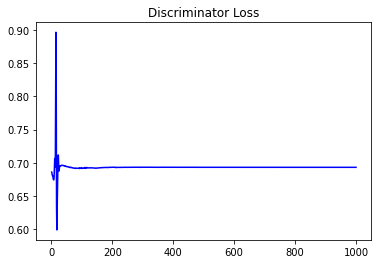

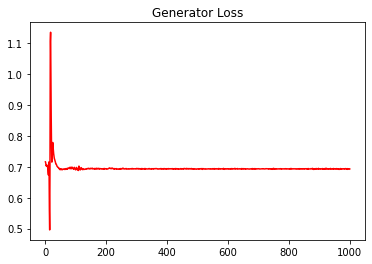

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.4994772039171699


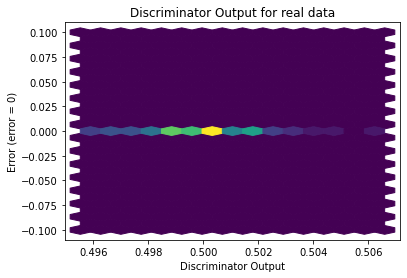

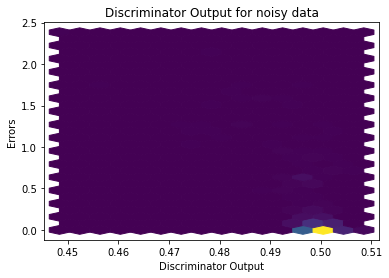

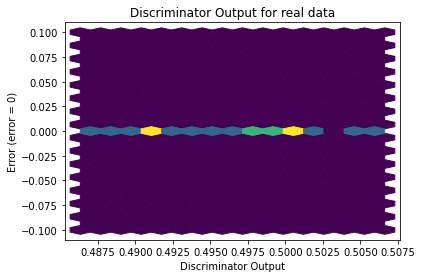

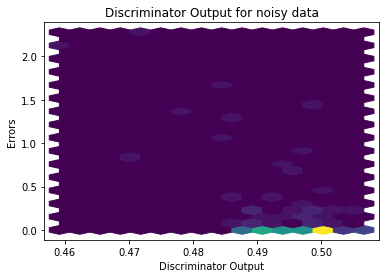

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


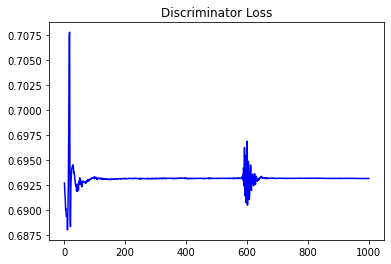

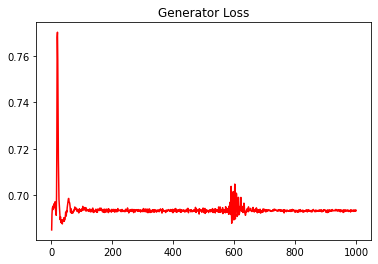

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.5450879943128892


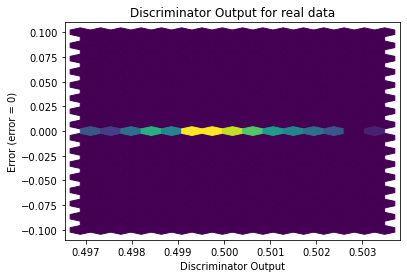

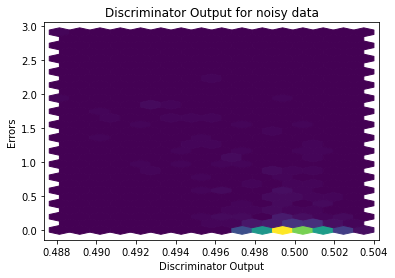

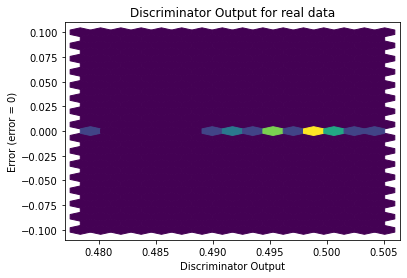

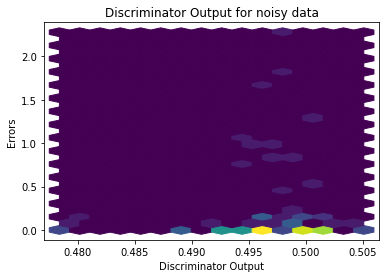

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2561]], requires_grad=True)
